In [119]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [120]:
path = 'aki_patients_filtered_clean'
df = pd.read_csv(path + '.csv')

In [121]:
# Split data
X = df[df.columns[4:]]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c:\Users\Andrew Chen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Andrew Chen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


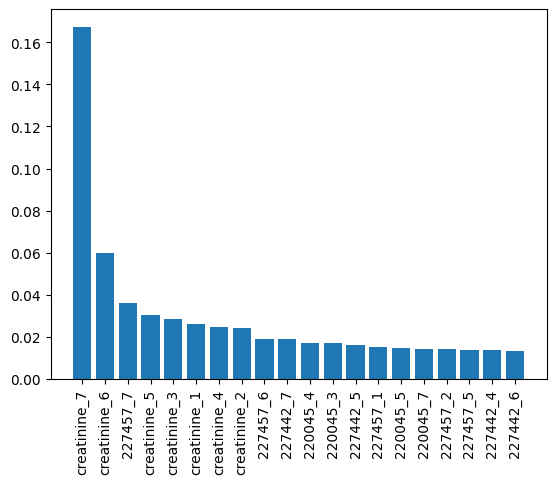

SVM accuracy: 86.37%
RF accuracy: 85.73%
LR accuracy: 84.53%
KNN accuracy: 74.86%
NB accuracy: 56.45%
DT accuracy: 78.36%
MLP accuracy: 87.66%
XGBoost accuracy: 90.15%


In [122]:
# Run models
res = []
models = []
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('XGBoost', XGBClassifier()))

for model in models:
    model_name, model_instance = model
    model_instance.fit(X_train, y_train)
    y_pred = model_instance.predict(X_test)
    res.append((model_name, accuracy_score(y_test, y_pred)))

# Plot feature importance
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
plt.figure()
# only show top 20
plt.bar(range(20), [importances[i] for i in indices[:20]])
plt.xticks(range(20), [X.columns[i] for i in indices[:20]], rotation=90)
plt.show()

# Print results
for model_name, accuracy in res:
    print(f'{model_name} accuracy: {accuracy*100:.2f}%')

XGBoost F1: 0.8972142170989433
XGBoost AUC: 0.9636249554850853


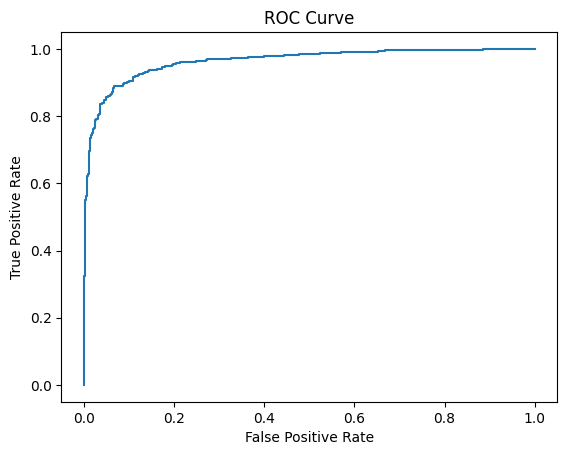

Specificity: 0.9394495412844037
Sensitivity: 0.8632162661737524


c:\Users\Andrew Chen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


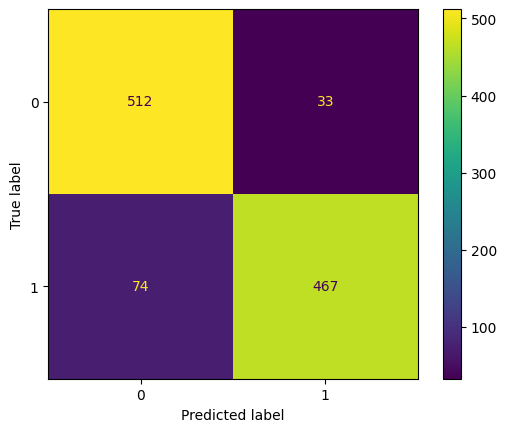

In [124]:
# Get F1 and AUC for XGB
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]
from sklearn.metrics import f1_score, roc_auc_score
print(f'XGBoost F1: {f1_score(y_test, y_pred)}')
print(f'XGBoost AUC: {roc_auc_score(y_test, y_pred_proba)}')
 # graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
# specificity and sensitivity
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print(f'Specificity: {specificity}')
print(f'Sensitivity: {sensitivity}')
# show confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)
plt.show()